# Target Problem

## Dataset

#### - Buseiness Case
I have created a diabetes prediction model that determines whether a person suffers from diabetes or not. I have used kaggle's pre-computed dataset, that includes BMI, blood pressure, age, blood glucose, insulin and number of pregnencies, etc. These details will be collected using web forms for a small price, and the model will determine whether or not the person is diabetic. This will be adaptable to clients, as compared to difficult endocrinologist appointments.

#### - Link to database: https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download

## Machine Learning Problem
We will be utilising body parameters(age, glucose, blood pressure, insulin, BMI, and other measurements) provided in dataset to predict if the person has diabetes. Because there's only two possible outcomes (0 or 1), this is obviously a classification problem. Since the dependent variable(target) is categorical, i.e., predicting 1 for diabetic and 0 for non-diabetic, I will be using Logistic Regression model.

# ML Workflow

## Model Requirements
- To predict the outcome, I will be using body parameters like age, BMI, glucose, blood pressure, and other parameters.
- I will be predicting using Logistic Regression.
- To evaluate the system, I will use accuracy metric.
- I used StandardScaler in the pre-processing stage to standardise the input dataset's range of functionality (Mean = 0 and SD =1).


In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Reading the data set
df = pd.read_csv("diabetes.csv")

## Data Description
 - Pregnancies: Number of times pregnant
 - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - BloodPressure: Diastolic blood pressure (mm Hg)
 - SkinThickness: Triceps skin fold thickness (mm)
 - Insulin: 2-Hour serum insulin (mu U/ml)
 - BMI: Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigreeFunction: Diabetes pedigree function
 - Age: Age (years)
 - Outcome: Class variable (0 or 1)

## Data Exploration

In [3]:
# Printing the   dataframe's first five rows.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Printing the dataframe's last five rows.
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


There are 768 samples and 9 features in this dataset.
One is a dependent variable, whereas the other eight are independent variables.

In [5]:
# Getting data dimensions
df.shape

(768, 9)

In [6]:
# Checking if data has any null values.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There have been no missing or empty values since all of the columns have the same count.

In [7]:
# Another way to check for empty values.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As seen, there aren't any values missing.

In [8]:
# Checking the data types of features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


A few columns or variables, such as Insulin, Glucose, BMI, SkinThickness, and , BloodPressure contain an incorrect zero value that must be dealt with.

## Data Cleaning
### Managing values that are missing.

In [10]:
# Replace the 0 values in these columns with their respective mean values seperately.
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BMI'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['BMI'].mean())

All 0 values have now been dealt with by substituting them with respective mean values. Since, all the features are important to make prediction, we are not removine any of the feature.

## Data Visualization
### Histograms of different features

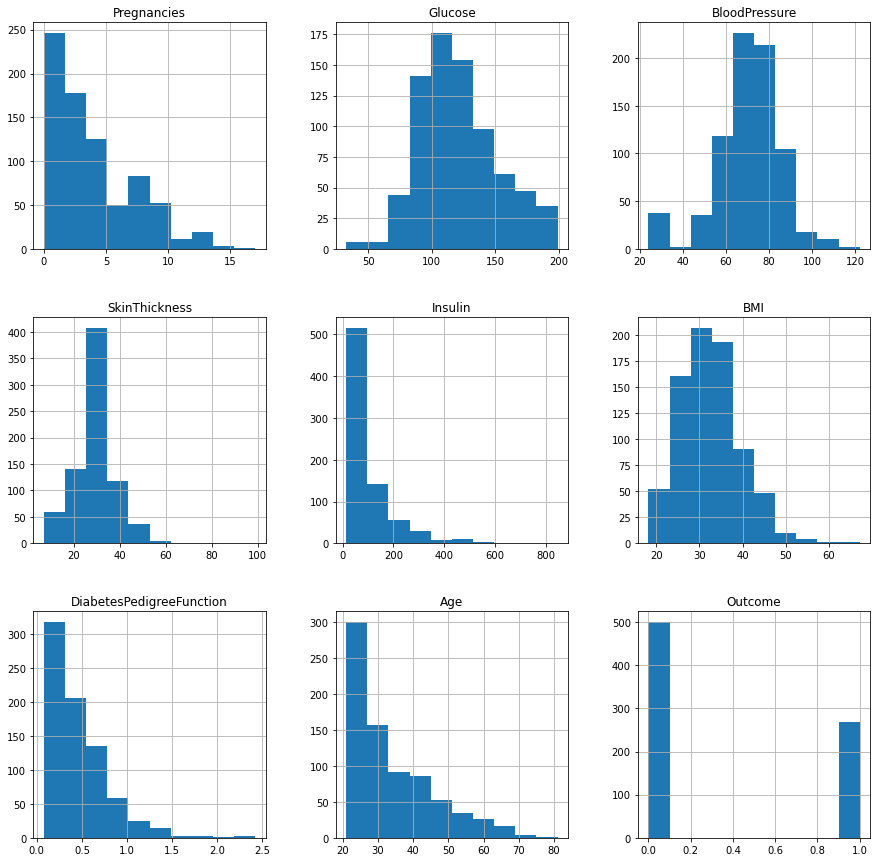

In [11]:
p = df.hist(figsize = (15,15))

Conclusion: Except for the glucose and blood pressure histograms, most of the characteristic distributions are right-skewed.

### Forming catplots for categorical data.

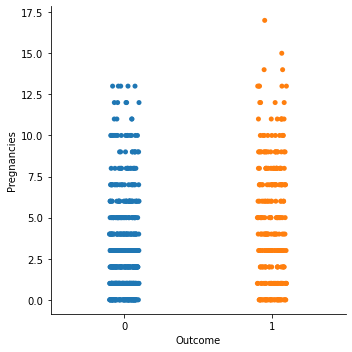

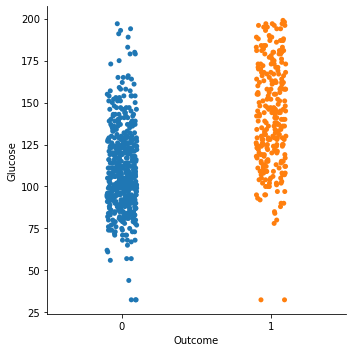

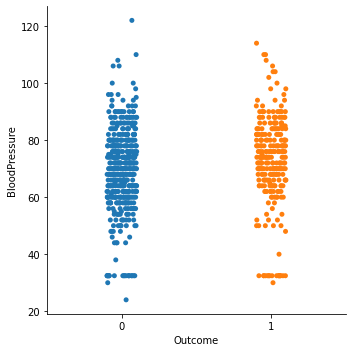

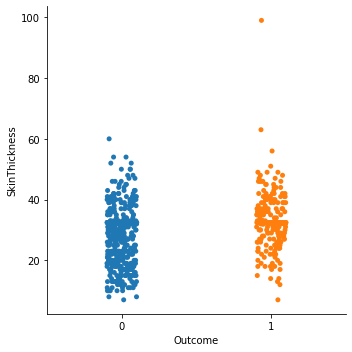

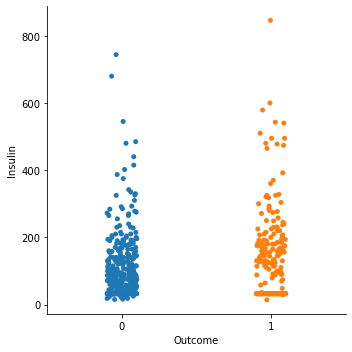

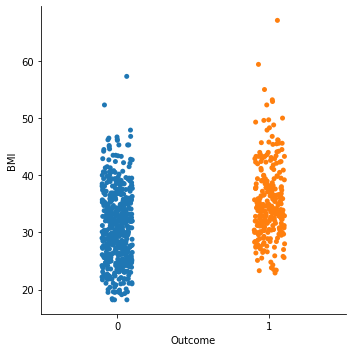

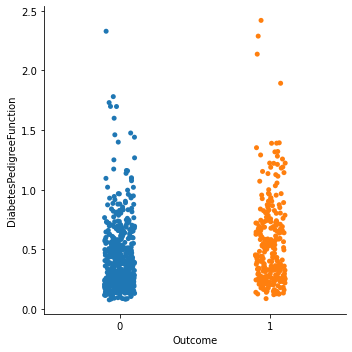

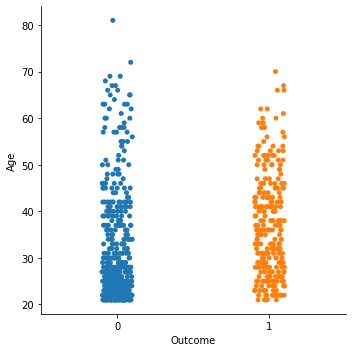

In [12]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot(x="Outcome", y=col,data = df)

Conclusion: Looking at the catplots, we can conclude that all the dataset is balanced.

### BOXPLOT Visualization

<AxesSubplot:>

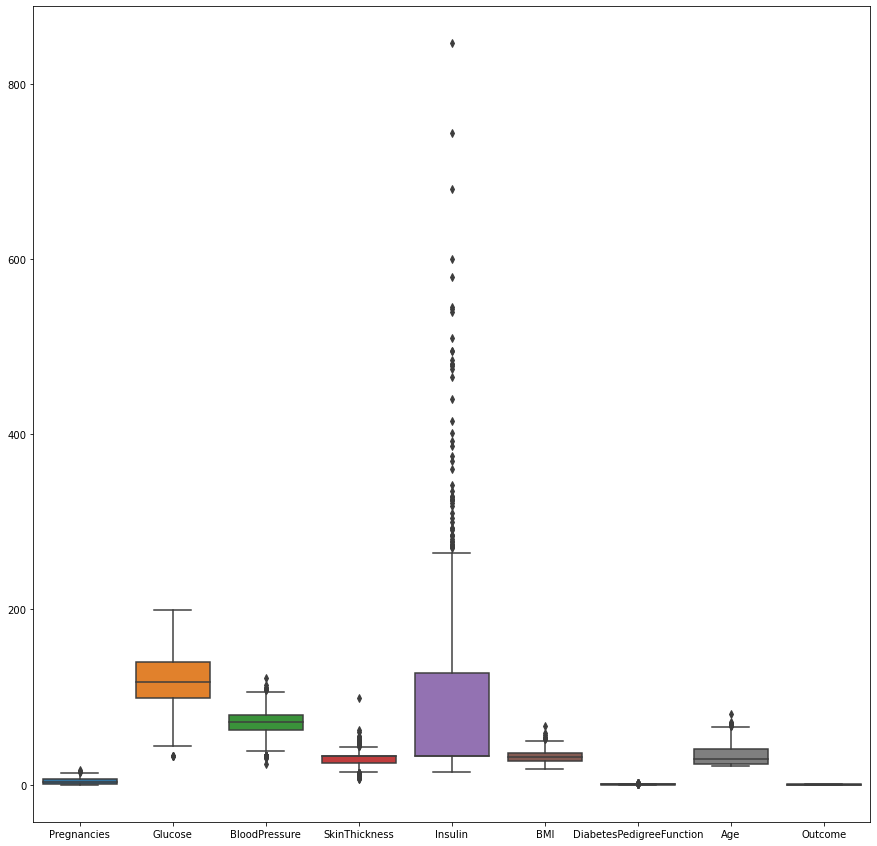

In [13]:
fig , ax = plt.subplots(figsize = (15,15))
sns.boxplot(data = df, ax = ax)

Conclusion: We can conclude that insulin has the most number of outliers which needs to be handled.

### PairPlot Visualization

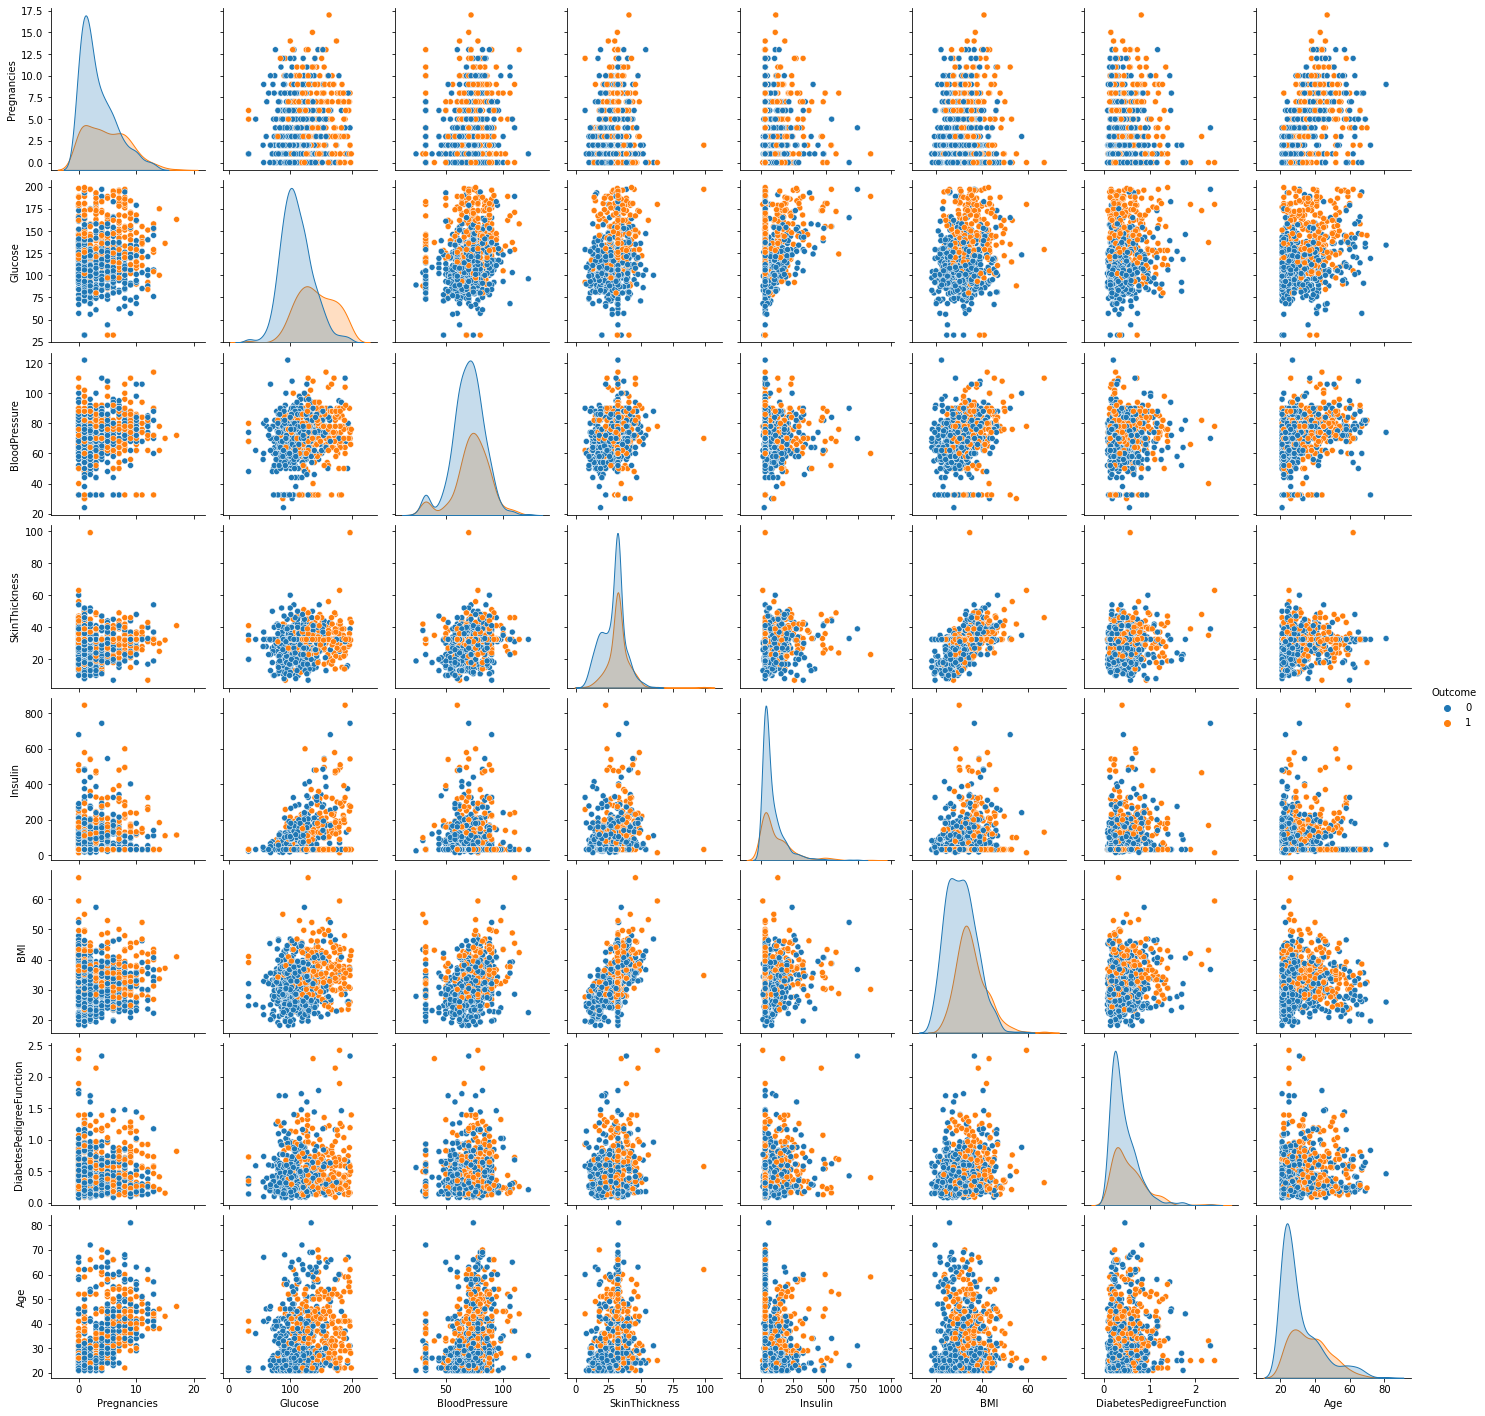

In [14]:
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

Conclusion: The quantity of glucose in the blood is the most easily detectable variable. Diabetes develops once a particular amount of glucose is exceeded, as shown by the blue spots on the graph.

### Heatmap Visualization

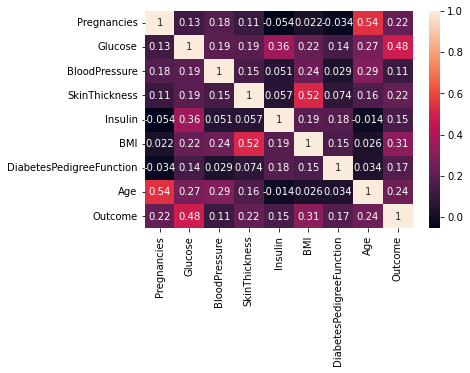

In [15]:
sns.heatmap(df.corr(), annot = True)
plt.show()

Conclusion: We can observe again from correlation heatmap that Outcome and [Insulin, Glucose, Age, BMI] have a strong relationship. These attributes can be chosen to take user input and forecast the outcome.

## Data Labeling
Since we are not computing any new feature and there is no requirement to change the features, we will not be labeling the features.

## Feature Engineering

Now we will add crucial characteristics to the dataset in order to find some useful properties before using machine learning models to fit it into.
#### Feature 1: BMI_DESC: BMI Descriptor
If BMI is below 18.5 -> Underweight,
          between 18.5 and 24.9 -> Healthy,
          over 25.0 -> Obese


In [16]:
def new_bmi(row):
    if row["BMI"] < 18.5:
        return "Under"
    elif row["BMI"] >= 18.5 and row["BMI"] <= 29.9:
        return "Healthy"
    elif row["BMI"] >= 30.0:
        return "Obese"

In [17]:
df = df.assign(BMI_DESC=df.apply(new_bmi, axis=1))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_DESC
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1,Obese
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0,Healthy
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1,Healthy
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Healthy
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Obese


#### Feature 2: GLU_DESC: Glucose Descriptor
If the glucose range is greater than 16 and less than or equal to 166, it is considered normal, else abnormal.

In [18]:
def new_glucose(row):
    if row["Glucose"] >= 16 and row["Glucose"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
    
df = df.assign(GLU_DESC=df.apply(new_glucose, axis=1))


In [19]:
 df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_DESC,GLU_DESC
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1,Obese,Normal
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0,Healthy,Normal
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1,Healthy,Abnormal
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Healthy,Normal
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Obese,Normal


<AxesSubplot:xlabel='GLU_DESC', ylabel='count'>

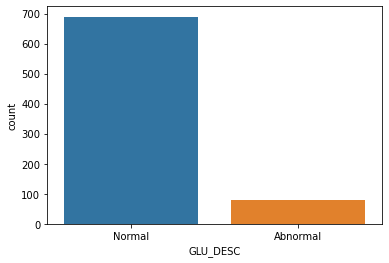

In [20]:
# Visualising patients having normal or abnormal blood glucose
sns.countplot(data=df, x = 'GLU_DESC', label='Count')

It seems from the figure that almost 700 females have normal blood glucose levels and about 50 females have abnormal glucose levels.

<AxesSubplot:xlabel='BMI_DESC', ylabel='count'>

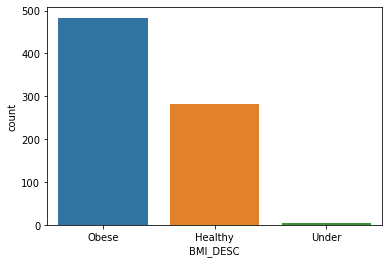

In [21]:
sns.countplot(data=df, x = 'BMI_DESC', label='Count')

Here there are over 450 females categorized as obese, 300 as healthy and almost 0 categorized as underweight.

In [22]:
# Converting categorical to numerical data(one hot encoding).
X=pd.get_dummies(df)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_DESC_Healthy,BMI_DESC_Obese,BMI_DESC_Under,GLU_DESC_Abnormal,GLU_DESC_Normal
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1,0,1,0,0,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0,1,0,0,0,1
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1,1,0,0,1,0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,1,0,0,0,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,0,1,0,0,1


In [23]:
# Standardizing dataframe using standard scalar.
scaler = StandardScaler()
x = X.drop(columns=['Outcome'])  #features
y = X['Outcome'] #labels
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.86057758,  0.09641992, ..., -0.07235746,
        -0.33861324,  0.33861324],
       [-0.84488505, -1.15533613, -0.31223908, ..., -0.07235746,
        -0.33861324,  0.33861324],
       [ 1.23388019,  1.98052965, -0.44845875, ..., -0.07235746,
         2.9532218 , -2.9532218 ],
       ...,
       [ 0.3429808 , -0.00338544,  0.09641992, ..., -0.07235746,
        -0.33861324,  0.33861324],
       [-0.84488505,  0.15660771, -0.72089808, ..., -0.07235746,
        -0.33861324,  0.33861324],
       [-0.84488505, -0.89934709, -0.03979975, ..., -0.07235746,
        -0.33861324,  0.33861324]])

## Model Training

In [24]:
# Data splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.17,random_state=144) 

# Model training
logi_model = LogisticRegression(verbose=1,n_jobs=1,solver='liblinear')
logi_model.fit(x_train,y_train)


[LibLinear]iter  1 act 1.302e+02 pre 1.175e+02 delta 1.071e+00 f 4.415e+02 |g| 3.054e+02 CG   3
iter  2 act 1.237e+01 pre 1.102e+01 delta 1.071e+00 f 3.113e+02 |g| 6.276e+01 CG   4
iter  3 act 6.109e-01 pre 5.842e-01 delta 1.071e+00 f 2.990e+02 |g| 1.179e+01 CG   4
iter  4 act 1.907e-02 pre 1.655e-02 delta 1.071e+00 f 2.984e+02 |g| 1.099e+00 CG   6
iter  5 act 1.903e-03 pre 1.751e-03 delta 1.071e+00 f 2.983e+02 |g| 1.455e-01 CG   6
iter  6 act 3.949e-05 pre 3.893e-05 delta 1.071e+00 f 2.983e+02 |g| 2.180e-02 CG   7


LogisticRegression(n_jobs=1, solver='liblinear', verbose=1)

## Model Evaluation

Predicting for the very first record of our dataset.

In [25]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_DESC,GLU_DESC
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1,Obese,Normal
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0,Healthy,Normal
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1,Healthy,Abnormal
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Healthy,Normal
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Obese,Normal


In [26]:
out = logi_model.predict(x_test)

# prediction for 1 row.
prob = logi_model.predict_proba([x_test[2]])
print(prob)

[[0.90238045 0.09761955]]


For a single person prediction, the accuracy is ~85%.

In [27]:
# Printing Confusion Matrix
c_mat = confusion_matrix(y_test, out)
print(c_mat)

[[79  6]
 [18 28]]


In [28]:
# Printing Acuracy Score
print(accuracy_score(y_test, out))

0.816793893129771


Here, we have got the model's accuracy which is 82% accurate. There might be some issue where the user may enter wrong data. This will have huge impact on model's prediction and the accuracy might decrease drastically. In this case, we can write a note on the data collection form that the model is not 100% accurate, consult family doctor if necessary.